In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


# Question 1: basic Q-learning performance.

### Script: 
- The code for running the DQN can by found in dqn.py

### Computing Resource: 
- This result was obtained on AWS... with 

### Implentation: 
- Used Huber loss instead of mean square error
- Also used tf.stop_gradient, though I'm not sure that was necessary. 

### Results: 
- My average return did not increase as fast as the reference solution by 1m steps, but that could have been my random seed. However, it did get to optimal performance by 3.5m. 


In [5]:
date = '2017-09-30-23:02'

In [8]:
time_steps = np.loadtxt('results/time_steps'+date+'.txt')
mean_returns = np.loadtxt('results/mean_episode_rewards'+date+'.txt')
best_returns = np.loadtxt('results/best_mean_episode_rewards'+date+'.txt')
df=pd.DataFrame({'time_steps':time_steps,'mean_returns':mean_returns,'best_returns':best_returns})
#df.head()

In [68]:
df = df.set_index('time_steps',drop=True)

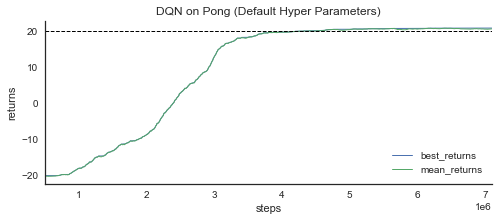

In [69]:
sns.set_style('white')

df.plot(linewidth=1,figsize=(8,3))

plt.title('DQN on Pong (Default Hyper Parameters)')
plt.axhline(y=20,linestyle='--',color='k',linewidth=1)
sns.despine()
plt.ylabel('returns')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('steps')

plt.savefig('figs/Q1.png',dpi=300)

# Question 2: experimenting with hyperparameters.

- For this question. 

In [10]:
from dqn_utils import *

In [38]:
benchmark = gym.benchmark_spec('Atari40M')
# Change the index to select a different game.
task = benchmark.tasks[3]
task.max_timesteps
# rough estimate 
num_iterations = float(task.max_timesteps) / 4.0
num_iterations

10000000.0

In [ ]:
ts= np.arange(7e6)

In [35]:
# used exploration schedule 
exploration_schedule = PiecewiseSchedule(
        [
            (0, 1.0),
            (1e6, 0.1),
            (num_iterations / 2, 0.01),
        ], outside_value=0.01
    )
es1 = [exploration_schedule.value(t) for t in ts]

In [37]:
#  
exploration_schedule = PiecewiseSchedule(
        [
            (0, 1.0),
            (2e6, 0.1),
            (num_iterations / 2, 0.01),
        ], outside_value=0.01
    )
es2 = [exploration_schedule.value(t) for t in ts]

In [41]:
# 
exploration_schedule = PiecewiseSchedule(
        [
            (0, 1.0),
            (5e5, 0.1),
            (num_iterations / 2, 0.01),
        ], outside_value=0.01
    )
es3 = [exploration_schedule.value(t) for t in ts]

In [43]:
# 
exploration_schedule = PiecewiseSchedule(
        [
            (0, 1.0),
            (1e6, 0.01),
            (num_iterations / 2, 0.01),
        ], outside_value=0.01
    )
es4 = [exploration_schedule.value(t) for t in ts]

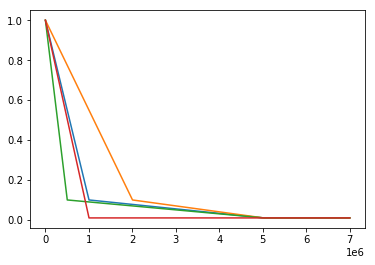

In [44]:
plt.plot(ts,es)
plt.plot(ts,es2)
plt.plot(ts,es3)
plt.plot(ts,es4)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [71]:
!jupyter nbconvert --to pdf --template pdf_template_nocode.tplx HW3_gagne.ipynb

[NbConvertApp] Converting notebook HW3_gagne.ipynb to pdf
[NbConvertApp] Support files will be in HW3_gagne_files/
[NbConvertApp] Making directory HW3_gagne_files
[NbConvertApp] Writing 16827 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 31767 bytes to HW3_gagne.pdf
